> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** lucas takeshi, Jonathan Lopes, Matheus Silva
* **Matrícula:** 2665, 2666, 2649

----
# Importação dos Dados

In [ ]:
### NÃO REMOVA ESSA CÉLULA! ####

!wget https://raw.githubusercontent.com/LTaka/cs-go-csv/main/tb_lobby_stats_player.csv
!wget https://raw.githubusercontent.com/LTaka/cs-go-csv/main/tb_medalha.csv
!wget https://raw.githubusercontent.com/LTaka/cs-go-csv/main/tb_players.csv
!wget https://raw.githubusercontent.com/LTaka/cs-go-csv/main/tb_players_medalha.csv

--2022-06-28 11:45:22--  https://raw.githubusercontent.com/LTaka/cs-go-csv/main/tb_lobby_stats_player.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28373607 (27M) [text/plain]
Saving to: ‘tb_lobby_stats_player.csv’

tb_lobby_stats_play 100%[===================>]  27.06M  --.-KB/s    in 0.08s   

2022-06-28 11:45:23 (345 MB/s) - ‘tb_lobby_stats_player.csv’ saved [28373607/28373607]

--2022-06-28 11:45:23--  https://raw.githubusercontent.com/LTaka/cs-go-csv/main/tb_medalha.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12

In [ ]:
#### Não altere essa célula!!! ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
original_df_lobby = pd.read_csv('./tb_lobby_stats_player.csv')
original_df_players = pd.read_csv('./tb_players.csv')
df_l =original_df_lobby
df_p =original_df_players
#Informações de players
#df_p.info()
#tratando os dados de players
df_p = df_p.drop("flFacebook",axis=1)
df_p = df_p.drop("flTwitter",axis=1)
df_p = df_p.drop("flTwitch",axis=1)
df_p = df_p.drop("dtBirth",axis=1)
df_p['dtRegistration'] = pd.to_datetime(df_p['dtRegistration'], infer_datetime_format=True)
df_l['qtSurvived'].fillna('drop', inplace=True)
#drop dos NAN
drop=df_l[df_l["qtSurvived"]=='drop'].index
df_l=df_l.drop(drop)
#Informações de players
#df_p.info()
#Informações de lobby
#df_l.info()
#tratando os dados de lobby
df_l = df_l.drop("qtShots",axis=1)
df_l = df_l.drop("qtPlusKill",axis=1)
df_l = df_l.drop("dtCreatedAt",axis=1)
df_l = df_l.drop("qtHitRightLeg",axis=1)
df_l = df_l.drop("qtHitLeftLeg",axis=1)
df_l = df_l.drop("qtHitRightArm",axis=1)
df_l = df_l.drop("qtHitLeftAtm",axis=1)
df_l = df_l.drop("qtHitStomach",axis=1)
df_l = df_l.drop("qtHitChest",axis=1)
df_l = df_l.drop("qtHitHeadshot",axis=1)
df_l = df_l.drop("qtTk",axis=1)
df_l = df_l.drop("qtTkAssist",axis=1)
#Informações de lobby
#df_l.info()
#criação de dados categóricos de acordo com cada parametro
#STATS na coluna de jogador junto com teste de hipotese para verificar se o player morre menos

In [ ]:
# Calcular kill por round
def kpr(kills, rounds):
  kpr = kills/rounds #quanto mais alto melhor 
  return kpr

def dpr(deaths, rounds): #quanto mais próximo de 0 melhor
  dpr = deaths/rounds
  return dpr

#qtAssist - 15, qtBombePlant - 15, qtBombeDefuse - 20, qtClutchWon - 20, qtTrade - 10, qtFlashAssist - 10, qtFirstKill - 10
def distPoints(qtAssist, qtBombePlant, qtBombeDefuse, qtClutchWon, qtTrade, qtFlashAssist, qtFirstKill):
  qtAssist = qtAssist*15
  qtBombePlant = qtBombePlant*15
  qtBombeDefuse = qtBombeDefuse*20
  qtClutchWon = qtClutchWon*20
  qtTrade = qtTrade*10
  qtFlashAssist = qtFlashAssist*10
  qtFirstKill = qtFirstKill*10
  total = (qtAssist+qtBombePlant+qtBombeDefuse+qtClutchWon+qtTrade+qtFlashAssist+qtFirstKill)/7
  return total

df_l.insert((df_l.shape[1]),"kpr",kpr(df_l['qtKill'], df_l['qtRoundsPlayed']),True) #Kills Per Round
df_l.insert((df_l.shape[1]),"dpr",dpr(df_l['qtDeath'], df_l['qtRoundsPlayed']),True) #Deaths Per Round
df_l.insert((df_l.shape[1]),"pps",distPoints(df_l['qtAssist'], df_l['qtBombePlant'], df_l['qtBombeDefuse'], df_l['qtClutchWon'], df_l['qtTrade'], df_l['qtFlashAssist'], df_l['qtFirstKill']),True) #Points Per Stats
df_l.insert((df_l.shape[1]),"playerQuality",'Null',True) #Player Quality
df_l



,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qt1Kill,...,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,flWinner,kpr,dpr,pps,playerQuality
0,1,1,1,5,1,16,2,0,0,3,...,de_mirage,10,1.0,2.0,0.0,0,0.294118,0.941176,6.428571,Null
1,2,1,2,24,3,18,6,0,4,9,...,de_nuke,9,8.0,1.0,0.0,1,0.888889,0.666667,23.571429,Null
2,3,2,3,6,4,23,2,0,1,4,...,de_mirage,2,2.0,3.0,0.0,0,0.240000,0.920000,17.857143,Null
3,3,391,27508,10,5,20,4,1,0,6,...,de_mirage,15,3.0,4.0,0.0,1,0.400000,0.800000,23.571429,Null
4,4,2,4,8,4,26,6,0,2,4,...,de_nuke,2,4.0,4.0,2.0,0,0.266667,0.866667,22.857143,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184147,172907,2716,178496,21,3,13,5,1,1,8,...,de_vertigo,9,11.0,0.0,0.0,1,0.807692,0.500000,15.714286,Null
184148,172908,2716,178497,15,1,22,5,0,1,11,...,de_nuke,9,7.0,5.0,0.0,1,0.517241,0.758621,18.571429,Null
184149,172909,2716,178498,9,6,23,2,0,3,9,...,de_vertigo,9,4.0,2.0,0.0,0,0.333333,0.851852,25.000000,Null
184150,172910,2716,178499,15,5,20,6,0,2,13,...,de_dust2,9,5.0,3.0,1.0,0,0.600000,0.800000,22.142857,Null


In [ ]:
def playerQuality(df):
  for i in df.index:
    if (df['pps'][i] <= 20.0):
      df['playerQuality'][i] = 'Ruim'
    elif ((df['pps'][i] > 20.0)&(df['pps'][i] <= 40.0)):
      df['playerQuality'][i] = 'Regular'
    elif ((df['pps'][i] > 40.0)&(df['pps'][i] <= 60.0)):
      df['playerQuality'][i] = 'Bom'
    elif ((df['pps'][i] > 60.0)&(df['pps'][i] <= 80.0)):
      df['playerQuality'][i] = 'Muito Bom'
    elif (df['pps'][i] > 80.0):
      df['playerQuality'][i] = 'Excelente'

In [ ]:
playerQuality(df_l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Sett

In [ ]:
df_l['playerQuality'].value_counts()

Regular      97791
Ruim         80100
Bom           5439
Muito Bom      114
Excelente        3
Name: playerQuality, dtype: int64

In [ ]:
df_l.sample(10)

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qt1Kill,...,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,flWinner,kpr,dpr,pps,playerQuality
172700,161494,2482,166309,11,1,8,6,1,0,5,...,de_inferno,16,4.0,2.0,0.0,1,0.916667,0.666667,7.857143,Ruim
5192,4573,56,4577,19,1,18,6,1,2,13,...,de_dust2,16,9.0,1.0,1.0,1,0.655172,0.620690,15.000000,Ruim
35782,31895,446,32058,16,6,18,10,0,2,10,...,de_dust2,11,4.0,4.0,0.0,0,0.695652,0.782609,25.714286,Regular
111906,102675,1603,104565,25,3,21,9,1,2,8,...,de_mirage,19,5.0,0.0,0.0,0,0.925926,0.777778,20.714286,Regular
135947,125800,1968,128656,16,3,19,5,0,0,5,...,de_mirage,19,5.0,3.0,0.0,0,0.640000,0.760000,19.285714,Ruim
121655,111991,1769,114251,11,2,16,2,0,1,7,...,de_train,14,4.0,1.0,2.0,0,0.523810,0.761905,10.714286,Ruim
155462,144601,2236,148439,17,3,18,3,0,2,5,...,de_inferno,10,7.0,2.0,0.0,0,0.653846,0.692308,19.285714,Ruim
92599,84346,1310,85637,20,3,27,6,1,3,12,...,de_mirage,14,6.0,6.0,0.0,0,0.588235,0.794118,32.857143,Regular
40003,35774,523,35996,12,3,18,4,0,1,5,...,de_dust2,0,2.0,3.0,0.0,0,0.571429,0.857143,17.142857,Ruim
149472,138707,2141,142226,16,3,20,5,1,2,7,...,de_inferno,9,2.0,3.0,1.0,0,0.695652,0.869565,23.571429,Regular


In [ ]:
df_l[df_l["pps"]>80]

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qt1Kill,...,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,flWinner,kpr,dpr,pps,playerQuality
46292,41640,614,41943,27,17,47,12,2,5,20,...,de_vertigo,11,9.0,11.0,2.0,0,0.457627,0.79661,81.428571,Excelente
127197,117343,1864,119819,85,17,63,31,0,2,22,...,de_dust2,20,19.0,11.0,2.0,0,1.011905,0.75000,90.714286,Excelente
161675,150570,2304,154721,45,18,48,22,1,3,20,...,de_dust2,20,12.0,11.0,6.0,1,0.750000,0.80000,86.428571,Excelente


In [ ]:
goodPlayers = df_l[df_l['kpr'] > 1]
df_l['pps'].describe()
#separar em qualidade (atributo categorico: Ruim, Regular, Bom, Muito bom, Excelente - 0-20,20-40,40-60,60-80,80-100)

#veryGoodPlayers
#para categorizar e melhor fazer uma tabela de peso, em 100 pts quantos cada coluna vale? (qtAssist - 15, qtBombePlant - 15, qtBombeDefuse - 25, qtClutchWon - 25, qtTrade - 10, qtFlashAssist - 10)
#dessa forma pegamos e fazemos uma media ponderada acima da média seria excelente e abaixo seria muito bom
#correlacionar com dpr pois pode ser que esteja relacionado excelentes jogadores morrem menos
#correlacionar com dano


count    183447.000000
mean         22.203719
std           8.961585
min           0.000000
25%          16.428571
50%          21.428571
75%          27.857143
max          90.714286
Name: pps, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'kpr por mapa')

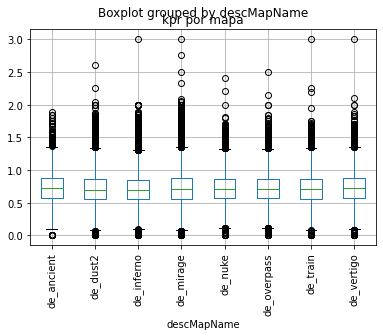

In [ ]:
killPorMapa = df_l.boxplot(column='kpr',by="descMapName", rot =90)
killPorMapa.set_title("kpr por mapa")
#inconclusivo por enquanto, pois o mapa que tem mais kills também é o mapa mais jogado
#isso deve ser calculado com base na media de kills por partida 

In [ ]:
x = df_l.groupby('descMapName')
y = x['qtKill'].count()
x['qtKill'].describe()
#MEDIA DE KILLS POR MAPA

,count,mean,std,min,25%,50%,75%,max
descMapName,,,,,,,,
de_ancient,4214.0,19.456573,7.562597,0.0,14.0,19.0,24.0,61.0
de_dust2,23752.0,18.973097,7.576358,0.0,14.0,19.0,24.0,85.0
de_inferno,41853.0,18.825795,7.261584,0.0,14.0,18.0,23.0,70.0
de_mirage,57988.0,19.136752,7.571786,0.0,14.0,19.0,24.0,73.0
de_nuke,13926.0,19.336924,7.434826,0.0,14.0,19.0,24.0,60.0
de_overpass,14039.0,19.285063,7.454221,0.0,14.0,19.0,24.0,67.0
de_train,7841.0,19.021553,7.573327,0.0,14.0,19.0,24.0,68.0
de_vertigo,19834.0,19.491479,7.539516,0.0,14.0,19.0,24.0,63.0


In [ ]:
x = df_l.groupby('descMapName')
y = x['qtClutchWon'].count()
x['qtClutchWon'].describe()
#MEDIA DE CLUTCH POR MAPA

,count,mean,std,min,25%,50%,75%,max
descMapName,,,,,,,,
de_ancient,4214.0,0.500237,0.735570,0.0,0.0,0.0,1.0,6.0
de_dust2,23752.0,0.462740,0.710775,0.0,0.0,0.0,1.0,5.0
de_inferno,41853.0,0.443385,0.692478,0.0,0.0,0.0,1.0,8.0
de_mirage,57988.0,0.464631,0.709529,0.0,0.0,0.0,1.0,6.0
de_nuke,13926.0,0.496625,0.737278,0.0,0.0,0.0,1.0,7.0
de_overpass,14039.0,0.482869,0.725437,0.0,0.0,0.0,1.0,6.0
de_train,7841.0,0.475577,0.721179,0.0,0.0,0.0,1.0,5.0
de_vertigo,19834.0,0.510185,0.745292,0.0,0.0,0.0,1.0,8.0


In [ ]:
x = df_l.groupby('descMapName')
y = x['kpr'].count()
x['kpr'].describe()

#MEDIA DE CLUTCH POR MAPA

,count,mean,std,min,25%,50%,75%,max
descMapName,,,,,,,,
de_ancient,4214.0,0.733077,0.242540,0.0,0.566667,0.720000,0.880952,1.888889
de_dust2,23752.0,0.717692,0.247520,0.0,0.550000,0.700000,0.866667,2.600000
de_inferno,41853.0,0.707309,0.236019,0.0,0.550000,0.692308,0.851852,3.000000
de_mirage,57988.0,0.723960,0.248310,0.0,0.555556,0.703704,0.875000,3.000000
de_nuke,13926.0,0.727221,0.237718,0.0,0.566667,0.714286,0.869565,2.400000
de_overpass,14039.0,0.726422,0.238072,0.0,0.566667,0.714286,0.869565,2.500000
de_train,7841.0,0.721455,0.248313,0.0,0.555556,0.703704,0.866667,3.000000
de_vertigo,19834.0,0.732044,0.242955,0.0,0.566667,0.720000,0.882353,3.000000


In [ ]:
kill = df_l.qtKill.sum() #quantidade de kills do DataBase
flash = df_l.qtFlashAssist.sum()

flash/kill #porcentagem de kills que tiveram auxilio de flashs
#aproximadamente 2% das kills apenas tem assistencia de flashs

0.02982491868290841

In [ ]:
a = df_l.groupby('idLobbyGame')
a.count()

b = df_l[df_l['qtKill'] == 85]
b

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qt1Kill,...,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,flWinner,kpr,dpr,pps,playerQuality
127197,117343,1864,119819,85,17,63,31,0,2,22,...,de_dust2,20,19.0,11.0,2.0,0,1.011905,0.75,90.714286,Excelente


In [ ]:
r = df_l[df_l['playerQuality'] == 'Excelente']
r

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qt1Kill,...,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,flWinner,kpr,dpr,pps,playerQuality


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, '')

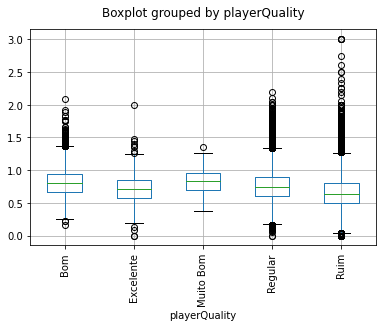

In [ ]:
killPorQualidade = df_l.boxplot(column='kpr',by="playerQuality", rot =90)
killPorQualidade.set_title("")

In [ ]:
win = df_l['flWinner']>0
win.value_counts()

False    93224
True     90928
Name: flWinner, dtype: int64

In [ ]:
temp = df_l[df_l['kpr']>1]
temp = temp[temp['qtClutchWon'] >= 1]
temp['qtClutchWon'].describe()


count    10611.000000
mean         1.470926
std          0.728301
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: qtClutchWon, dtype: float64

In [ ]:
a = goodPlayers[['dpr', 'qtSurvived']]
b = goodPlayers[['vlDamage', 'qtKill']]


In [ ]:
a.corr()

,dpr,qtSurvived
dpr,1.000000,-0.630881
qtSurvived,-0.630881,1.000000


In [ ]:
b.corr()

,vlDamage,qtKill
vlDamage,1.000000,0.949359
qtKill,0.949359,1.000000
